In [1]:
import torch
from tqdm import tqdm
from transformers import BertTokenizer
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [6]:
loss = torch.load('/mnt/disk3/Alfred/Rescoring/src/Correction/log/3plain/withLM/loss.pt')
loss_1best = torch.load('/mnt/disk3/Alfred/Rescoring/src/Correction/log/RoBart/loss_1best_withLM.pt')

In [8]:
print(len(loss['training_loss']))
print(len(loss['dev_loss']))


print(len(loss_1best['training_loss']))
print(len(loss_1best['dev_loss']))

50
10
50
10


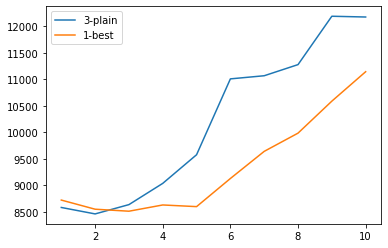

In [13]:
dev_loss = [l.item() for l in loss["dev_loss"]]
dev_loss

dev_1best_loss = [l.item() for l in loss_1best["dev_loss"]]

plt.plot(range(1,11), dev_loss, label = '3-plain')
plt.plot(range(1,11), dev_1best_loss, label = '1-best')
plt.legend()
plt.show()

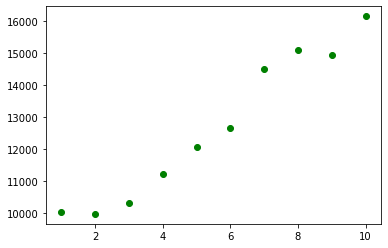

In [8]:
dev_loss = [l.item() for l in loss["dev_loss"]]
dev_loss

plt.plot(range(1,11), dev_loss, 'go')

In [14]:
step = [200 * k for k in range(1, 5)] + [939]
step = np.array(step)
single_step = np.array(step)
for i in range(1, 10):
    single_step = single_step + 939
    step = np.concatenate((step, single_step))

In [15]:
step.shape

(50,)

In [16]:
step

array([ 200,  400,  600,  800,  939, 1139, 1339, 1539, 1739, 1878, 2078,
       2278, 2478, 2678, 2817, 3017, 3217, 3417, 3617, 3756, 3956, 4156,
       4356, 4556, 4695, 4895, 5095, 5295, 5495, 5634, 5834, 6034, 6234,
       6434, 6573, 6773, 6973, 7173, 7373, 7512, 7712, 7912, 8112, 8312,
       8451, 8651, 8851, 9051, 9251, 9390])

[0.06923457980155945,
 0.029851365834474564,
 0.024397941306233406,
 0.026425300166010857,
 0.019110919907689095,
 0.02680891565978527,
 0.020665183663368225,
 0.017291370779275894,
 0.019221164286136627,
 0.014543815515935421,
 0.020846199244260788,
 0.015939561650156975,
 0.01292477734386921,
 0.014756755903363228,
 0.010852765291929245,
 0.016157016158103943,
 0.012146059423685074,
 0.00994215440005064,
 0.011396339163184166,
 0.00846848264336586,
 0.012684131041169167,
 0.009472484700381756,
 0.0074271406047046185,
 0.008467128500342369,
 0.00579548254609108,
 0.009179724380373955,
 0.007316846866160631,
 0.005597195588052273,
 0.006532850209623575,
 0.004366218112409115,
 0.00700184004381299,
 0.005264331120997667,
 0.004120422061532736,
 0.0048522865399718285,
 0.0031852233223617077,
 0.004692293703556061,
 0.003801595652475953,
 0.0030937010888010263,
 0.003519246820360422,
 0.002228641416877508,
 0.0035317169968038797,
 0.0028625084087252617,
 0.0021634541917592287,
 0.00273699

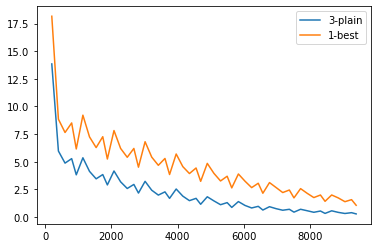

In [20]:
train_loss = [l.item() * 200 for l in loss["training_loss"]]
train_loss

train_loss_1best = [l.item() for l in loss_1best["training_loss"]]

plt.plot(step, train_loss, label = '3-plain')
plt.plot(step, train_loss_1best, label = '1-best')
plt.legend()
plt.show()

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

In [ ]:
device = 'cuda:0'if torch.cuda.is_available() else 'cpu'
device = torch.device(device)

In [ ]:
model = RescoreBert(
    train_batch=1,
    test_batch=1,
    nBest=10,
    use_MWER=True,
    use_MWED=False,
    device=device,
    lr=1e-4,
    weight=0.59
)

In [ ]:
state_dict = torch.load('./checkpoint/MWER/checkpoint_train_4.pt')
model.model.load_state_dict(state_dict["state_dict"])

In [ ]:
# token = '甚 至 出 现 交 易 几 乎 停 止 的 情 况'.split()
# token = '甚 至 出 现 交 易 几 乎 停 滞 的 情 况'.split()
token_ref = '楼 市 调 控 的 行 政 手 段 宜 减 不 宜 加'.split()
token_hyp = '楼 市 调 控 的 行 政 手 段 意 见 不 一 一'.split()
token_hyp_2 = '楼 市 调 控 的 行 政 手 段 意 见 不 一'.split()
token_id_ref = tokenizer.convert_tokens_to_ids(token_ref)
token_id_hyp = tokenizer.convert_tokens_to_ids(token_hyp)
token_id_hyp_2 = tokenizer.convert_tokens_to_ids(token_hyp_2)
token_id_ref = [101] + token_id_ref + [102]
token_id_hyp = [101] + token_id_hyp + [102]
token_id_hyp_2 = [101] + token_id_hyp_2 + [102]

In [ ]:
cos = torch.nn.CosineSimilarity()

In [ ]:
input_id_ref = torch.tensor(token_id_ref).unsqueeze(0).to(device)
input_id_hyp = torch.tensor(token_id_hyp).unsqueeze(0).to(device)
input_id_hyp_2 = torch.tensor(token_id_hyp_2).unsqueeze(0).to(device)

print(input_id_hyp)
print(input_id_hyp_2)
with torch.no_grad():
    output_ref = model.model(
        input_ids = input_id_ref,
    )[0]
    output_hyp = model.model(
        input_ids = input_id_hyp,
    )[0]

    output_hyp_2 = model.model(
        input_ids = input_id_hyp_2,
    )[0]

    sim = cos(output_ref.squeeze(0)[0], output_hyp_2.squeeze(0)[0])
    print(sim)

In [ ]:
distribution_dict = dict()
recog_set = ['dev', 'test']
for task in recog_set:
    distribution_dict[task] = {
        1:0,
        0.95:0,
        0.75:0,
        0.5:0,
        0.25:0,
        0:0,
        'same':0
    }

In [ ]:
cos = torch.nn.CosineSimilarity(0)
for task in recog_set:
    print(task)
    data = None
    with open(f'./data/aishell_{task}/rescore/MD_rescore_data.json') as f:
        data = json.load(f)
    
    for k in data['utts'].keys():
        
        token_ref = data['utts'][k]['output']['text_token'].split()
        token_hyp = data['utts'][k]['output']['rec_token'].split()  

        if (token_ref == token_hyp):
            distribution_dict[task]['same'] += 1
            continue

        token_id_ref = tokenizer.convert_tokens_to_ids(token_ref)
        token_id_hyp = tokenizer.convert_tokens_to_ids(token_hyp)
        token_id_ref = [101] + token_id_ref + [102]
        token_id_hyp = [101] + token_id_hyp + [102]

        input_id_ref = torch.tensor(token_id_ref).unsqueeze(0).to(device)
        input_id_hyp = torch.tensor(token_id_hyp).unsqueeze(0).to(device)
        with torch.no_grad():
            output_ref = model.model(
                input_ids = input_id_ref,
            )[0]

            output_hyp = model.model(
                input_ids = input_id_hyp,
            )[0]

        output_ref = output_ref.squeeze(0)[0]
        output_hyp = output_hyp.squeeze(0)[0]

        sim = cos(output_ref, output_hyp)
        if (sim >= 1):
            distribution_dict[task][1] += 1
        elif (sim < 1 and sim >= 0.95):
            distribution_dict[task][0.95] += 1
        elif (sim < 0.95 and sim >= 0.75):
            distribution_dict[task][0.75] += 1
        elif (sim < 0.75 and sim >= 0.5):
            distribution_dict[task][0.5] += 1
        elif (sim < 0.5 and sim >= 0.25):
            distribution_dict[task][0.25] += 1
        elif (sim < 0.25):
            distribution_dict[task][0] += 1

In [ ]:
distribution_dict['dev']

In [ ]:
distribution_dict['test']

In [ ]:
task = 'test'
labels = ["Sim == 1", "0.95 <= Sim < 1", "0.75 <= Sim < 0.95", "0.5 <= Sim < 0.75", "0.25 <= Sim < 0.5", "Sim < 0.25", "Same"]
value = list(distribution_dict[task].values())
fig, axe = plt.subplots()
patches, texts = plt.pie(
    value,
    startangle=90, radius=1.2 
    )

legend_labels = ['{} : {}'.format(k, v) for k, v in zip(labels, value)]

# sort_legend = True
# if sort_legend:
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, list(distribution_dict['test'].values())),
#                                           key=lambda x: x[2],
#                                           reverse=True))

plt.legend(patches, legend_labels, loc = 'best', bbox_to_anchor=(-0.1, 1), fontsize=8)

plt.show()

In [ ]:
model.eval()
input_id = torch.tensor(token_id_hyp).unsqueeze(0)
with torch.no_grad():
    attention_map = model.model(
        input_ids = input_id,
        output_attentions = True
    ).attentions


In [ ]:
input_id_ref = torch.tensor(token_id_ref).unsqueeze(0)
input_id_hyp = torch.tensor(token_id_hyp).unsqueeze(0)
with torch.no_grad():
    output_ref = model.model(
        input_ids = input_id_ref,
    )[0]

    output_hyp = model.model(
        input_ids = input_id_hyp,
    )[0]

output_ref = output_ref.squeeze(0)[0]
output_hyp = output_hyp.squeeze(0)[0]

In [ ]:

print(cos(output_ref.squeeze(0)[0], output_hyp.squeeze(0)[0]))

In [ ]:
fig, axe = plt.subplots(figsize = (10,10))
total_map = np.zeros(attention_map[0][0][0].shape)
for i in range(len(attention_map)):
    np_map = attention_map[i].numpy().squeeze(0)
    np_map = np_map[-1]
    np_map = np_map * 1e8
    np_map = np_map.astype(int)
    np_map = np_map / np.linalg.norm(np_map)
    total_map += np_map
# total_map = np.insert(total_map, 10, 0, axis = 1)
# total_map = np.insert(total_map, 10, 0, axis = 0)
c = axe.pcolor(total_map, vmin = 0, vmax = 1)
fig.colorbar(c, ax = axe)
plt.show()